<a href="https://colab.research.google.com/github/MDTanveerAlam1/Association-Rules/blob/main/Association_Rules_Assignment_10_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for defining path
import os
import squarify

# for market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [26]:
# reading the dataset
data = pd.read_excel("Online retail.xlsx",header = None)

# checking the shape of the dataset
data.shape

(7501, 20)

In [27]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# checking tail of the data
data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7500,eggs,frozen smoothie,yogurt cake,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# desdcirbe the data set
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


#Data Visualizations
from the data set we can observe that for column 0 ie shrimps , people bought many different products, creating a word cloud will help in deteming the maximum bought products and the products that are bought along with the shrimps

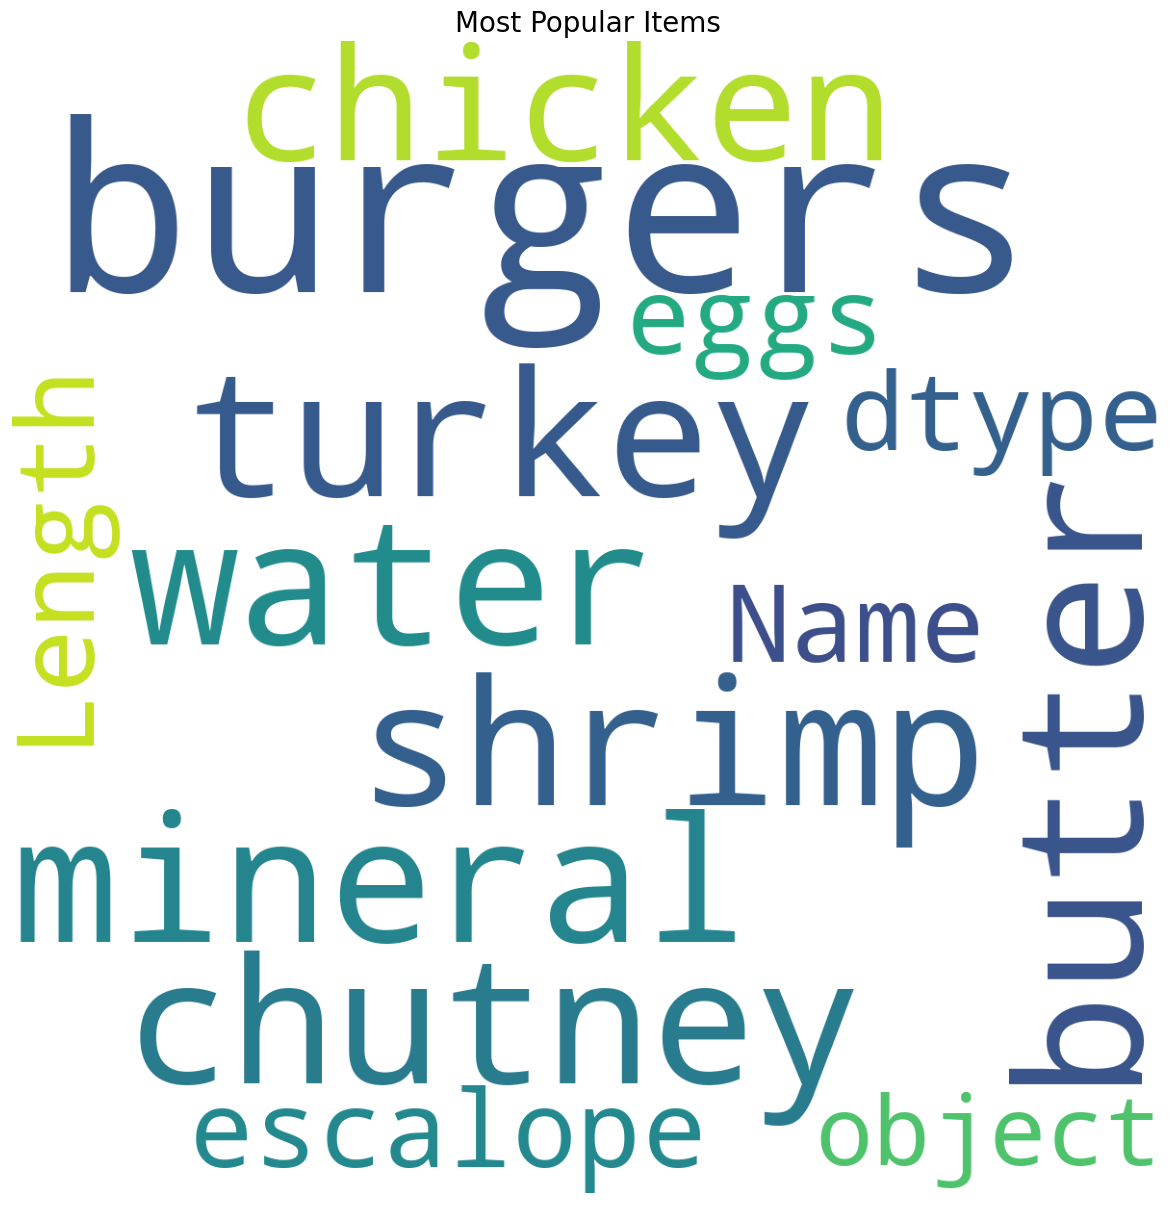

In [30]:

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 100).generate(str(data[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

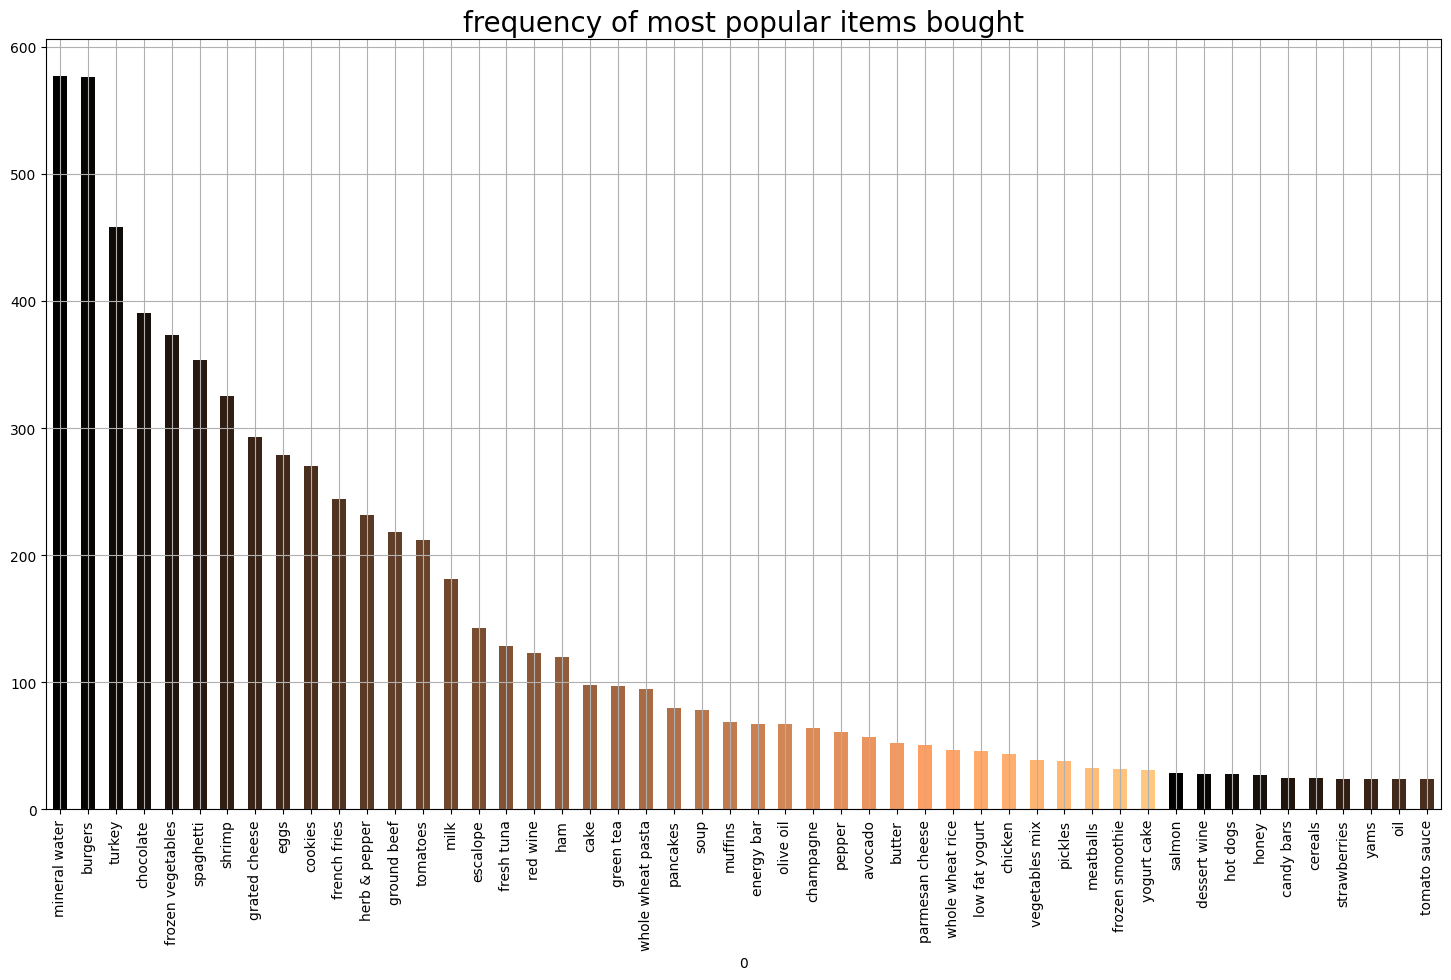

In [31]:
# The frequency of most popular items

plt.rcParams['figure.figsize'] = (18, 10)
color = plt.cm.copper(np.linspace(0, 1, 40))
data[0].value_counts().head(50).plot.bar(color = color)
plt.title('frequency of most popular items bought', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [32]:
y = data[0].value_counts().head(50).to_frame()
y.index
y.head()

,count
0,
mineral water,577
burgers,576
turkey,458
chocolate,391
frozen vegetables,373


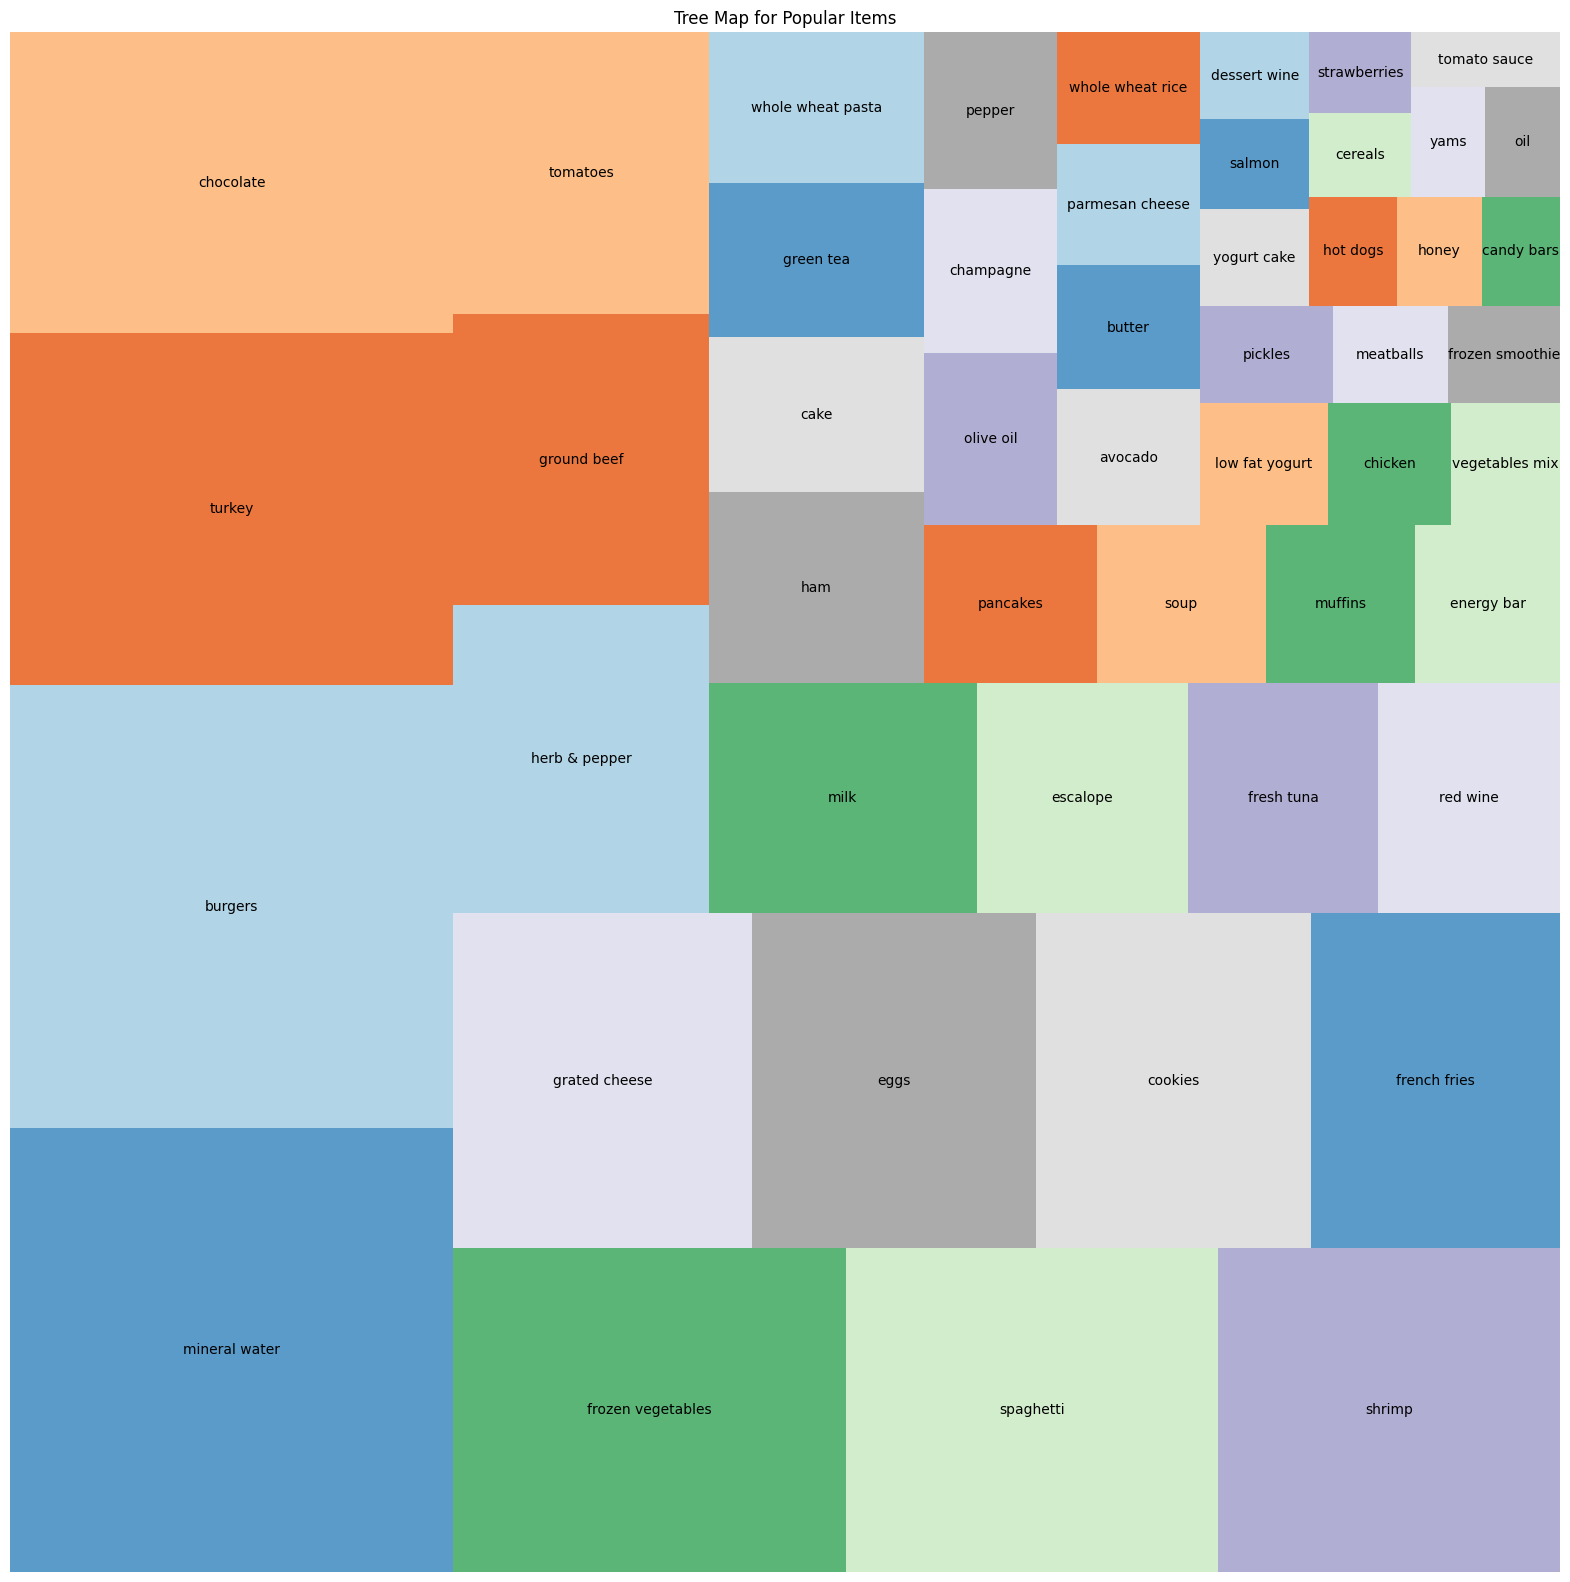

In [33]:
# plotting a tree map

plt.rcParams['figure.figsize'] = (20, 20)
color = plt.cm.tab20c(np.linspace(0, 1,10))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Popular Items')
plt.axis('off')
plt.show()

In [34]:
data['food'] = 'Food'
food = data.truncate(before = -1, after = 15)

In [35]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,food
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,...,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil,Food
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food


In [36]:
import networkx as nx

food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)

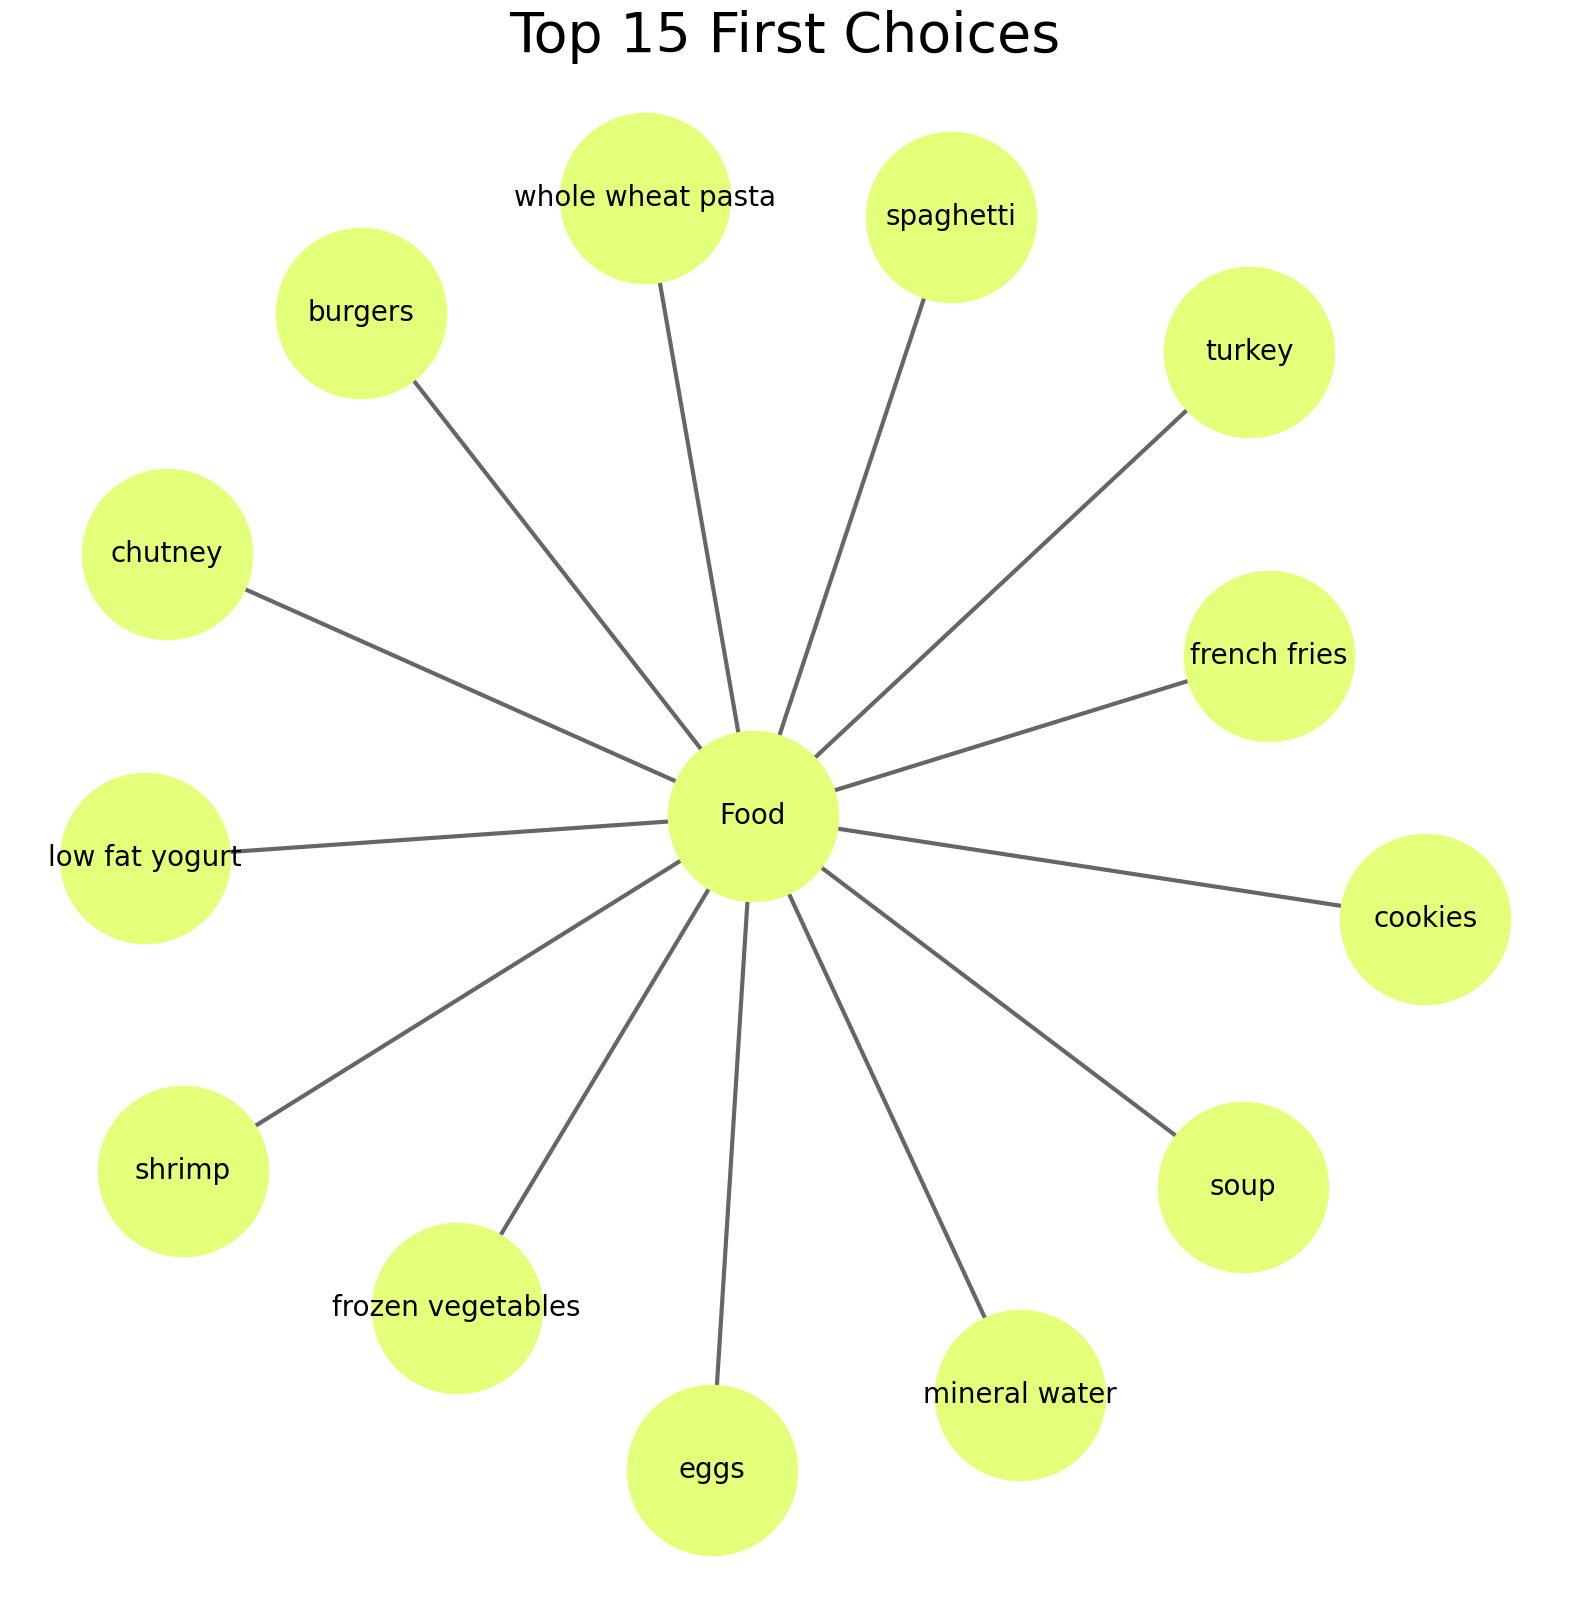

In [37]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(food)
color = plt.cm.Wistia(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 40)
plt.show()

In [38]:
data['secondchoice'] = 'Second Choice'
secondchoice = data.truncate(before = -1, after = 15)
secondchoice = nx.from_pandas_edgelist(secondchoice, source = 'food', target = 1, edge_attr = True)

In [39]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,food,secondchoice
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,...,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil,Food,Second Choice
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food,Second Choice
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food,Second Choice
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food,Second Choice
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food,Second Choice


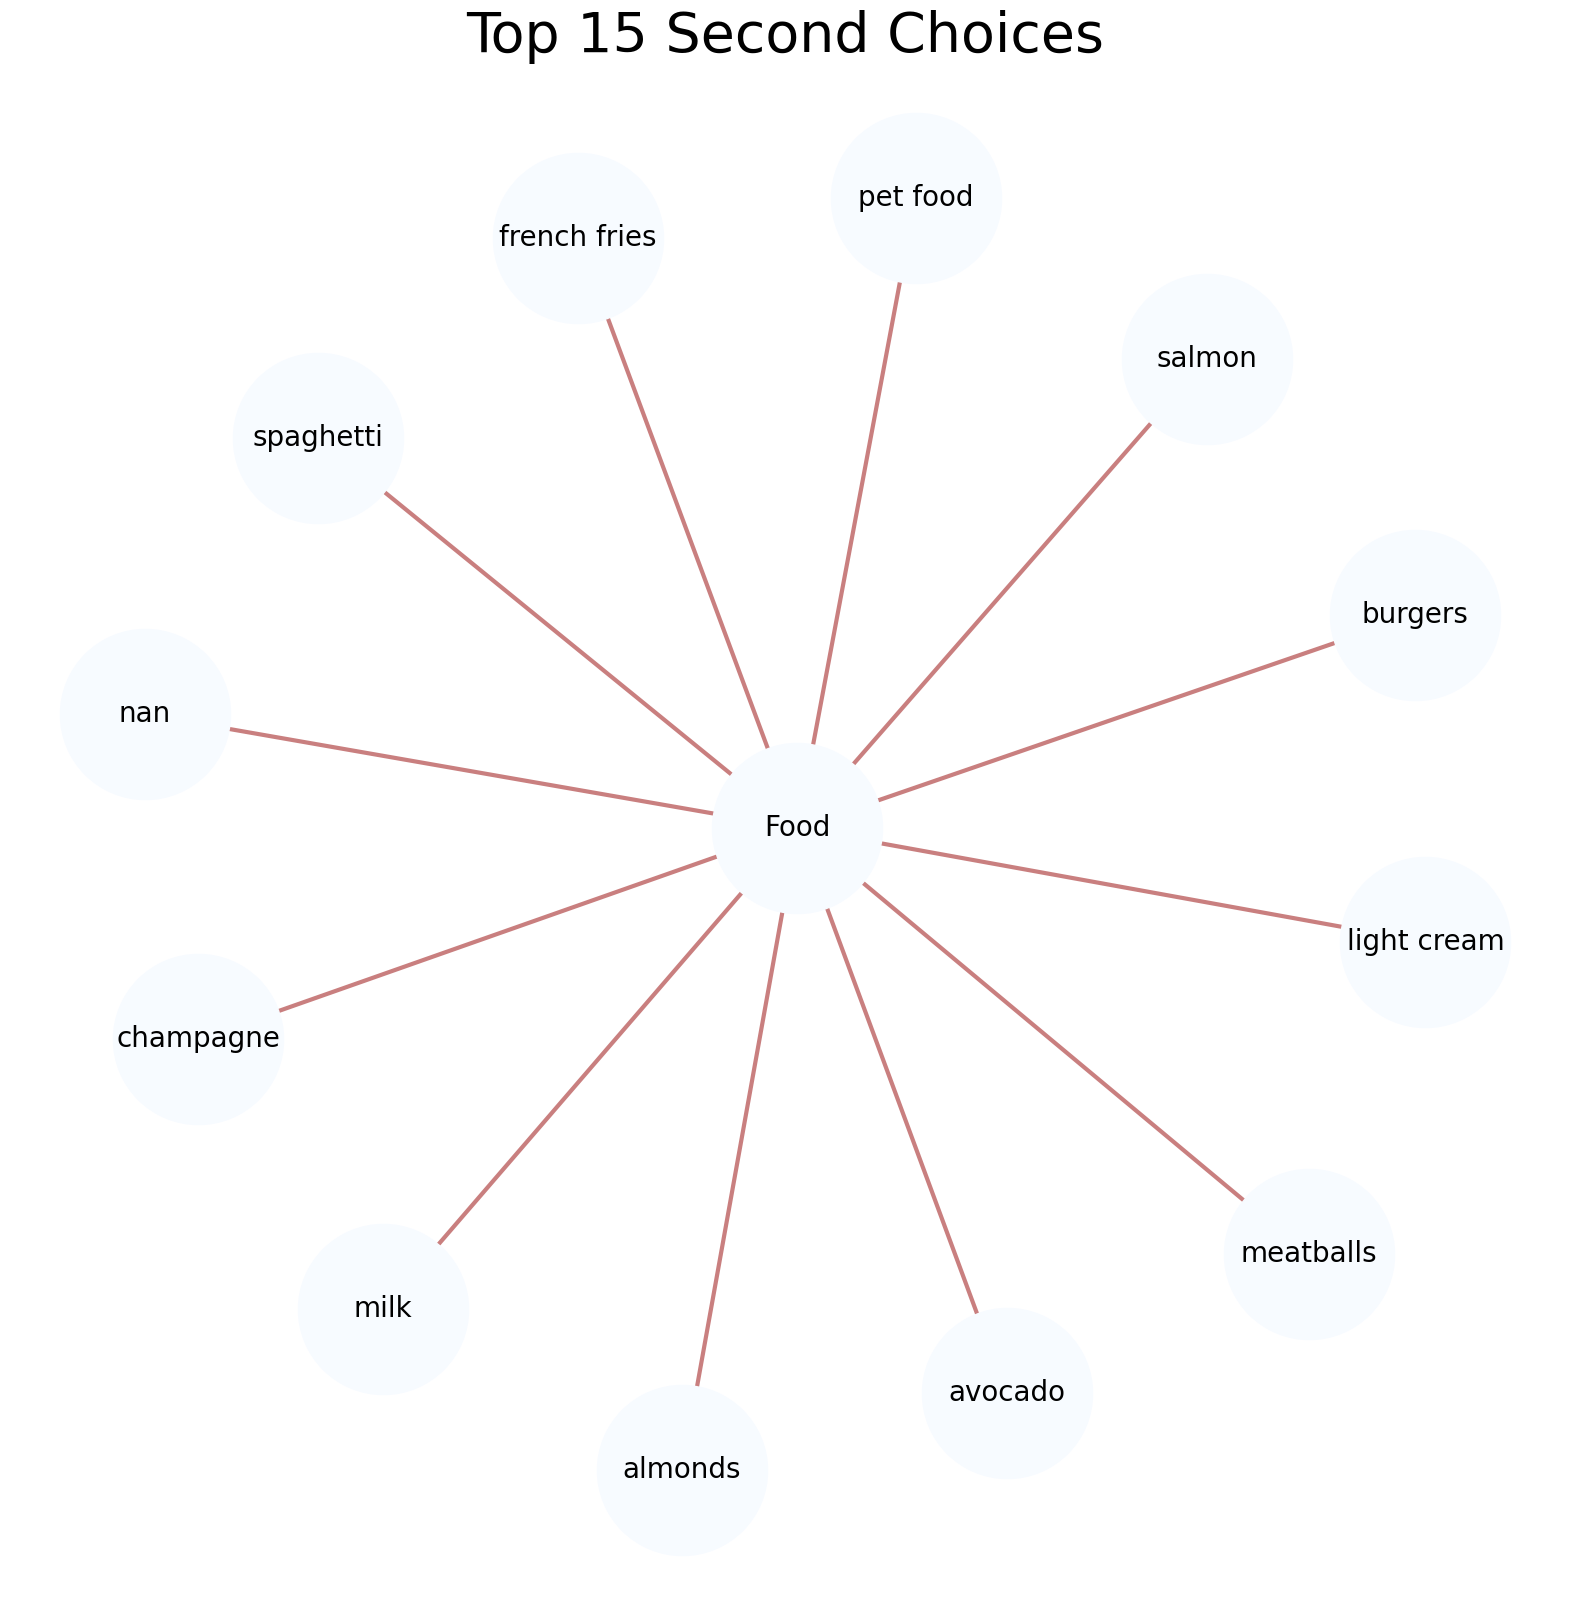

In [40]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(secondchoice)
color = plt.cm.Blues(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(secondchoice, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(secondchoice, pos, width = 3, alpha = 0.6, edge_color = 'brown')
nx.draw_networkx_labels(secondchoice, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 Second Choices', fontsize = 40)
plt.show()

In [41]:
data['thirdchoice'] = 'Third Choice'
secondchoice = data.truncate(before = -1, after = 10)
secondchoice = nx.from_pandas_edgelist(secondchoice, source = 'food', target = 2, edge_attr = True)

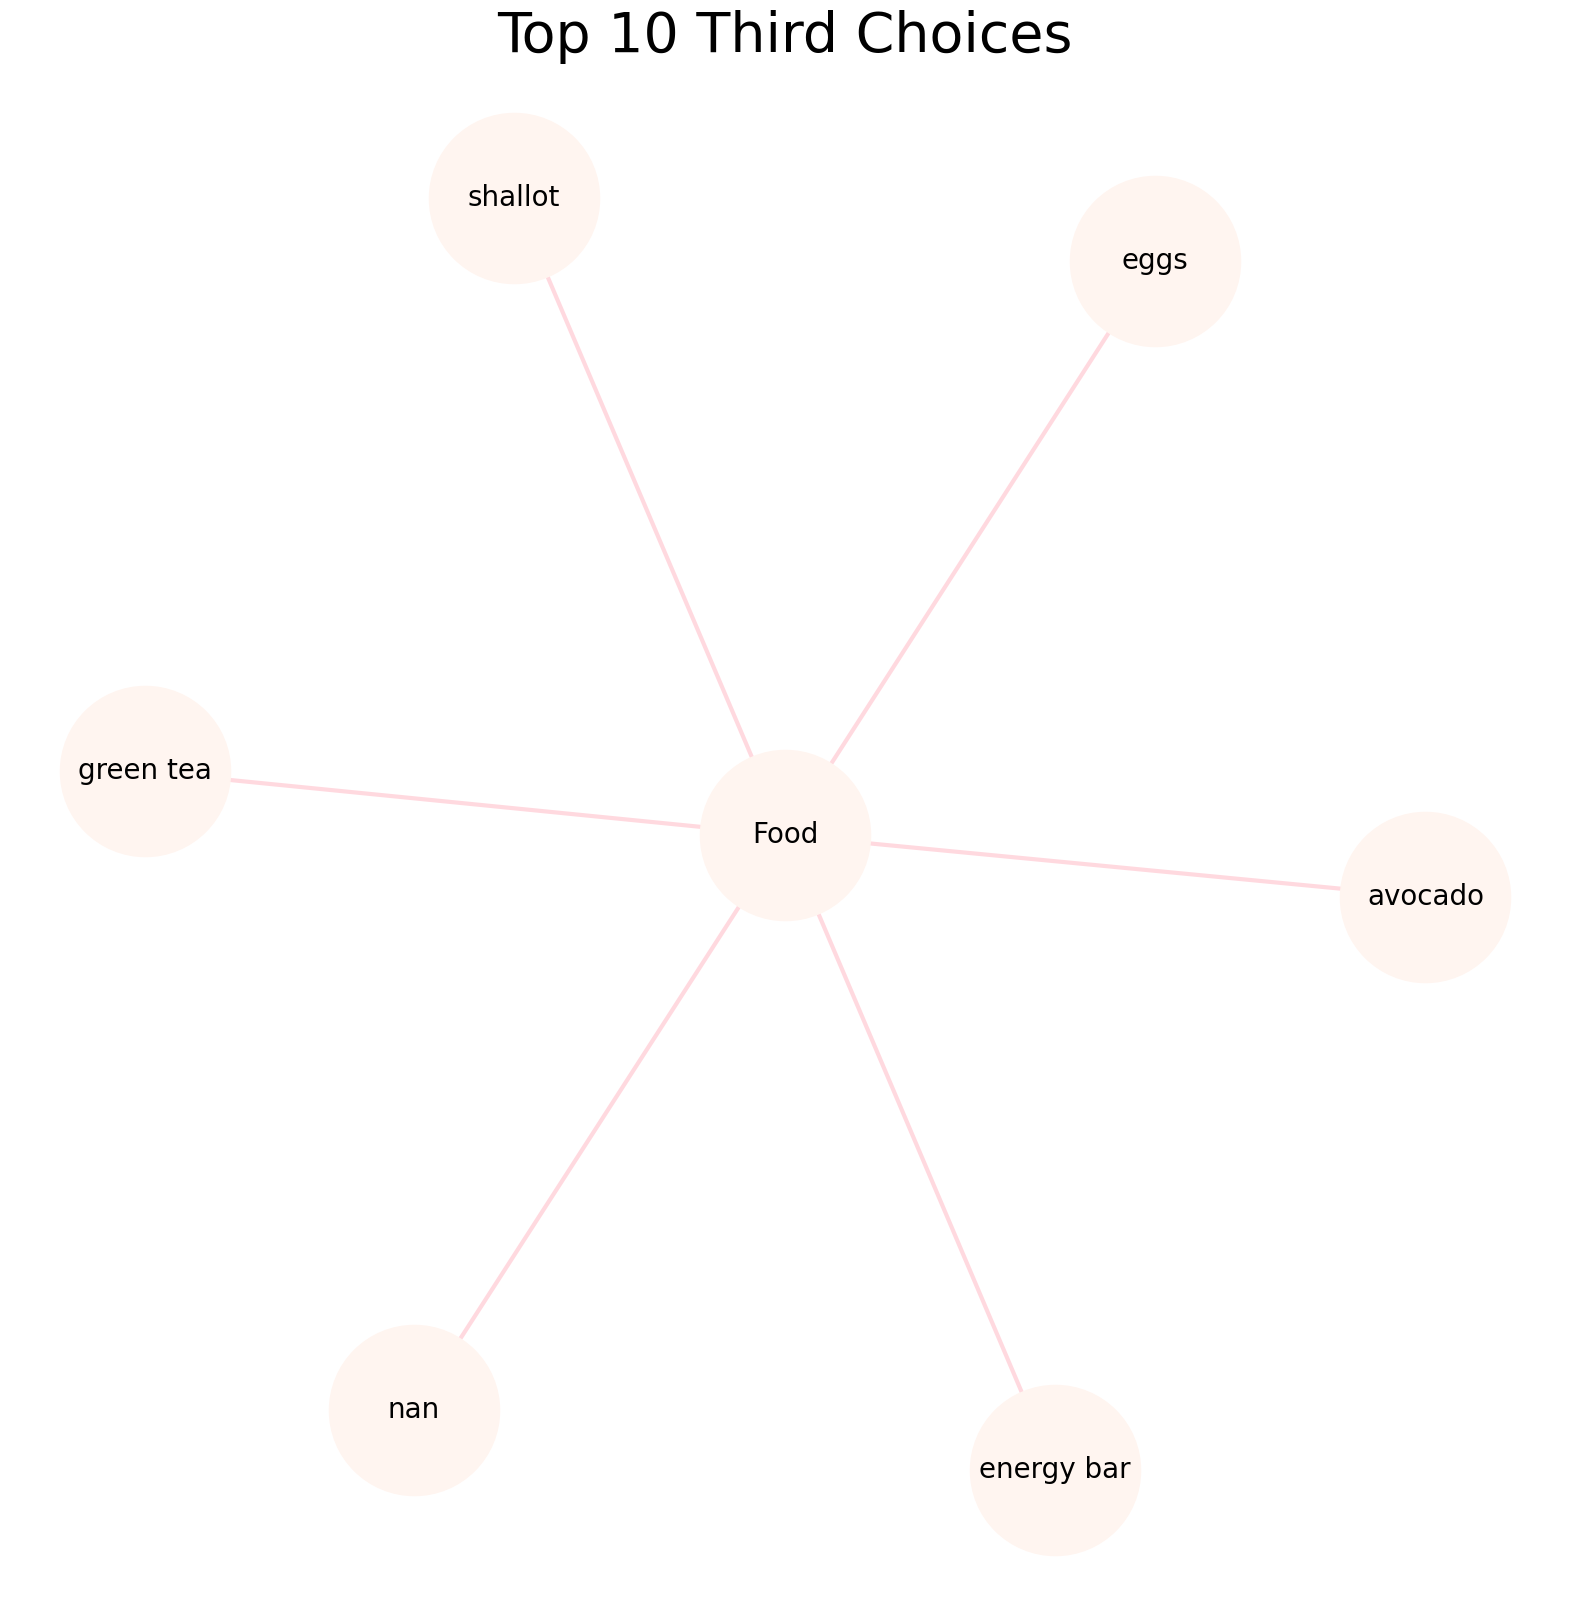

In [42]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(secondchoice)
color = plt.cm.Reds(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(secondchoice, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(secondchoice, pos, width = 3, alpha = 0.6, edge_color = 'pink')
nx.draw_networkx_labels(secondchoice, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 10 Third Choices', fontsize = 40)
plt.show()

# Data Preprocessing

In [43]:
# making each customers shopping items an identical list
trans = []
for i in range(0, 7501):
    trans.append([str(data.values[i,j]) for j in range(0, 20)])

# conveting it into an numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)

(7501, 20)


In [44]:
print(trans)

[['shrimp' 'almonds' 'avocado' ... 'frozen smoothie' 'spinach'
  'olive oil']
 ['burgers' 'meatballs' 'eggs' ... 'nan' 'nan' 'nan']
 ['chutney' 'nan' 'nan' ... 'nan' 'nan' 'nan']
 ...
 ['chicken' 'nan' 'nan' ... 'nan' 'nan' 'nan']
 ['escalope' 'green tea' 'nan' ... 'nan' 'nan' 'nan']
 ['eggs' 'frozen smoothie' 'yogurt cake' ... 'nan' 'nan' 'nan']]


# Using Transaction encoder

In [45]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)

# getting the shape of the data
data.shape

(7501, 121)

In [46]:
data.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [47]:
data.columns

Index([' asparagus', 'almonds', 'antioxydant juice', 'asparagus', 'avocado',
       'babies food', 'bacon', 'barbecue sauce', 'black tea', 'blueberries',
       ...
       'turkey', 'vegetables mix', 'water spray', 'white wine',
       'whole weat flour', 'whole wheat pasta', 'whole wheat rice', 'yams',
       'yogurt cake', 'zucchini'],
      dtype='object', length=121)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Columns: 121 entries,  asparagus to zucchini
dtypes: bool(121)
memory usage: 886.5 KB


In [49]:
data.columns.values

array([' asparagus', 'almonds', 'antioxydant juice', 'asparagus',
       'avocado', 'babies food', 'bacon', 'barbecue sauce', 'black tea',
       'blueberries', 'body spray', 'bramble', 'brownies', 'bug spray',
       'burger sauce', 'burgers', 'butter', 'cake', 'candy bars',
       'carrots', 'cauliflower', 'cereals', 'champagne', 'chicken',
       'chili', 'chocolate', 'chocolate bread', 'chutney', 'cider',
       'clothes accessories', 'cookies', 'cooking oil', 'corn',
       'cottage cheese', 'cream', 'dessert wine', 'eggplant', 'eggs',
       'energy bar', 'energy drink', 'escalope', 'extra dark chocolate',
       'flax seed', 'french fries', 'french wine', 'fresh bread',
       'fresh tuna', 'fromage blanc', 'frozen smoothie',
       'frozen vegetables', 'gluten free bar', 'grated cheese',
       'green beans', 'green grapes', 'green tea', 'ground beef', 'gums',
       'ham', 'hand protein bar', 'herb & pepper', 'honey', 'hot dogs',
       'ketchup', 'light cream', 'light mayo', 

Getting correlations for 121 items would be messy so let's reduce the items from 121 to 50 To decide which 50 to be taken , we will select the one with which are bought more frequently

In [50]:
import warnings
warnings.filterwarnings('ignore')



data = data.loc[:, ['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables', 'spaghetti',
                    'shrimp', 'grated cheese', 'eggs', 'cookies', 'french fries', 'herb & pepper', 'ground beef',
                    'tomatoes', 'milk', 'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
                    'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar', 'olive oil', 'champagne',
                    'avocado', 'pepper', 'butter', 'parmesan cheese', 'whole wheat rice', 'low fat yogurt',
                    'chicken', 'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie', 'yogurt cake']]

# checking the shape
data.shape

(7501, 40)

In [51]:
# checking the columns

data.columns

Index(['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables',
       'spaghetti', 'shrimp', 'grated cheese', 'eggs', 'cookies',
       'french fries', 'herb & pepper', 'ground beef', 'tomatoes', 'milk',
       'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
       'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar',
       'olive oil', 'champagne', 'avocado', 'pepper', 'butter',
       'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 'chicken',
       'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie',
       'yogurt cake'],
      dtype='object')

In [52]:
# getting the head of the data

data.head()

,mineral water,burgers,turkey,chocolate,frozen vegetables,spaghetti,shrimp,grated cheese,eggs,cookies,...,butter,parmesan cheese,whole wheat rice,low fat yogurt,chicken,vegetables mix,pickles,meatballs,frozen smoothie,yogurt cake
0,True,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,True,False
1,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


#**Applying apriori**

In [53]:
#pip install apyori

In [54]:
from mlxtend.frequent_patterns import apriori

#Now, let us return the items and itemsets with at least 5% support:
apriori(data, min_support = 0.01, use_colnames = True)

,support,itemsets
0,0.238368,(mineral water)
1,0.087188,(burgers)
2,0.062525,(turkey)
3,0.163845,(chocolate)
4,0.095321,(frozen vegetables)
...,...,...
204,0.010132,"(eggs, ground beef, mineral water)"
205,0.013065,"(eggs, milk, mineral water)"
206,0.011065,"(ground beef, milk, mineral water)"
207,0.010532,"(spaghetti, eggs, chocolate)"


The advantage of working with pandas DataFrames is that we can use its convenient features to filter the results. For instance, let's assume we are only interested in itemsets of length 2 that have a support of at least 80 percent. First, we create the frequent itemsets via apriori and add a new column that stores the length of each itemset:

#Selecting and Filtering the Results

In [55]:
frequent_itemsets = apriori(data, min_support = 0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.087188,(burgers),1
2,0.062525,(turkey),1
3,0.163845,(chocolate),1
4,0.095321,(frozen vegetables),1
5,0.174110,(spaghetti),1
6,0.071457,(shrimp),1
7,0.052393,(grated cheese),1
8,0.179709,(eggs),1
9,0.080389,(cookies),1


In [56]:
# getting the item sets with length = 2 and support more han 10%

frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
24,0.052660,"(chocolate, mineral water)",2
25,0.059725,"(spaghetti, mineral water)",2
26,0.050927,"(eggs, mineral water)",2


In [57]:
# getting the item sets with length = 1 and support more han 10%

frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.087188,(burgers),1
2,0.062525,(turkey),1
3,0.163845,(chocolate),1
4,0.095321,(frozen vegetables),1
5,0.174110,(spaghetti),1
6,0.071457,(shrimp),1
7,0.052393,(grated cheese),1
8,0.179709,(eggs),1
9,0.080389,(cookies),1


#Association Mining

In [58]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'eggs', 'mineral water'} ]

,support,itemsets,length
26,0.050927,"(eggs, mineral water)",2


In [59]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'mineral water'} ]

,support,itemsets,length
0,0.238368,(mineral water),1


In [60]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'milk'} ]

,support,itemsets,length
13,0.129583,(milk),1


In [61]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'chicken'} ]

,support,itemsets,length
22,0.059992,(chicken),1


In [62]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'frozen vegetables'} ]

,support,itemsets,length
4,0.095321,(frozen vegetables),1


In [63]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'chocolate'} ]

,support,itemsets,length
3,0.163845,(chocolate),1


In [68]:
# Association Mining with adjusted thresholds
frequent_itemsets = apriori(data, min_support=0.02, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# Generate association rules with adjusted metrics
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2) # Example: min_threshold for lift

#Further refine the rules based on confidence
rules = rules[rules['confidence'] >= 0.3] # Example: minimum confidence of 30%

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,1.0,0.013604,1.122357,0.308965,0.150648,0.109018,0.271158
2,(frozen vegetables),(mineral water),0.095321,0.238368,0.035729,0.374825,1.572463,1.0,0.013007,1.218270,0.402413,0.119911,0.179164,0.262357
4,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,1.0,0.018223,1.159314,0.369437,0.169312,0.137421,0.296796
6,(shrimp),(mineral water),0.071457,0.238368,0.023597,0.330224,1.385352,1.0,0.006564,1.137144,0.299568,0.082441,0.120604,0.214609
8,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,1.0,0.017507,1.305401,0.474369,0.138413,0.233952,0.294127
10,(tomatoes),(mineral water),0.068391,0.238368,0.024397,0.356725,1.496530,1.0,0.008095,1.183991,0.356144,0.086402,0.155399,0.229537
12,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,1.0,0.017105,1.209650,0.409465,0.150000,0.173315,0.285856
14,(cake),(mineral water),0.081056,0.238368,0.027463,0.338816,1.421397,1.0,0.008142,1.151921,0.322617,0.094064,0.131885,0.227014
16,(pancakes),(mineral water),0.095054,0.238368,0.033729,0.354839,1.488616,1.0,0.011071,1.180529,0.362712,0.112544,0.152922,0.248169
18,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,1.0,0.011020,1.401255,0.503221,0.086760,0.286354,0.276610


##Analysis and Interpretation:

In [69]:
import matplotlib.pyplot as plt
# Analyze association rules for interesting patterns

# Sort rules by lift to identify the strongest relationships
rules_sorted_by_lift = rules.sort_values(by='lift', ascending=False)

# Print or visualize the top rules
print("Top rules sorted by lift:")
print(rules_sorted_by_lift.head(10))  # Display top 10 rules, adjust as needed

# Analyze rules with high confidence and lift:
high_confidence_rules = rules[(rules['confidence'] >= 0.5) & (rules['lift'] >= 1.5)] # Adjust threshold as needed
print("\nHigh confidence and lift rules:")
print(high_confidence_rules)

# Analyze frequent itemsets:
# Identify frequent items that appear in many rules.
frequent_items = frequent_itemsets['itemsets'].apply(list).explode()
print("\nFrequent item counts:")
print(frequent_items.value_counts().head(10)) #Top 10 most frequent items

Top rules sorted by lift:
            antecedents      consequents  antecedent support  \
55        (ground beef)      (spaghetti)            0.098254   
63          (olive oil)      (spaghetti)            0.065858   
18               (soup)  (mineral water)            0.050527   
33            (burgers)           (eggs)            0.087188   
20          (olive oil)  (mineral water)            0.065858   
57           (tomatoes)      (spaghetti)            0.068391   
8         (ground beef)  (mineral water)            0.098254   
26            (chicken)  (mineral water)            0.059992   
2   (frozen vegetables)  (mineral water)            0.095321   
12               (milk)  (mineral water)            0.129583   

    consequent support   support  confidence      lift  representativity  \
55            0.174110  0.039195    0.398915  2.291162               1.0   
63            0.174110  0.022930    0.348178  1.999758               1.0   
18            0.238368  0.023064    0.456

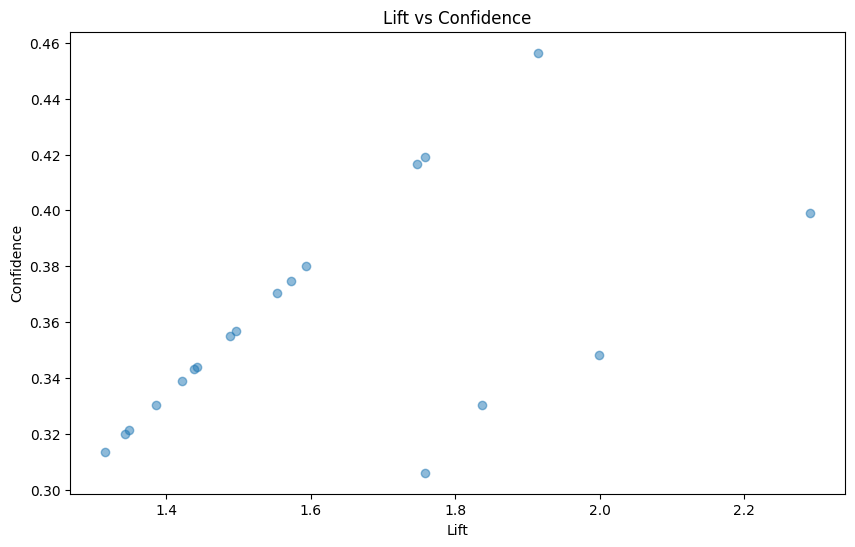

In [70]:
#Plot lift vs confidence
plt.figure(figsize=(10,6))
plt.scatter(rules['lift'], rules['confidence'], alpha=0.5)
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence')
plt.show()

##Interview Questions:
1.	What is lift and why is it important in Association rules?
2.	What is support and Confidence. How do you calculate them?
3.	What are some limitations or challenges of Association rules mining?

##1 .What is lift and why is it important in Association rules?
Lift is a number that tells us how much more likely two things happen together than if they were just happening by chance.

In association rules (like when we analyze shopping patterns), lift helps us see if buying one item actually increases the chance of buying another.

For example, if people who buy bread also buy butter, lift tells us if this is a strong connection or just random.

* Lift > 1 → The items are bought together more than expected (strong relationship).
* Lift = 1 → The items are bought together exactly as expected (no special relationship).
* Lift < 1 → The items are bought together less than expected (weak or no relationship).

##2. What is support and Confidence. How do you calculate them?


## Support

**Support tells us how often an item or a set of items appears in a dataset.**

* Think of a supermarket: If 100 people buy groceries and 40 of them buy milk, the support for milk is 40/100 = 40%.

* If 25 people buy both milk and bread, then the support for {milk, bread} is 25/100 = 25%.

Formula:

**Support=** (Transactions containing item(s) / Total transactions)

## Confidence

**Confidence tells us how likely it is that people who buy one item also buy another item.**

* Example: Suppose 30 out of 40 people who bought milk also bought bread. The confidence of the rule "If milk, then bread" is:

**Confidence=** (Transactions containing both items / Transactions containing the first item)

* Confidence = (25 / 40) = 62.5 %
* -->This means if someone buys milk, there is a 62.5% chance they will also buy bread.


### Support: How common an item or set of items is in all transactions.
### Confidence: If someone buys item A, how likely they are to also buy item B

## 3.	What are some limitations or challenges of Association rules mining?

1. Too Many Rules: When you try to find patterns (rules) in data, you might end up with a huge number of rules, and it can be hard to sort through them to find the useful ones.

2. Quality of Rules: Not all rules you find are helpful. Some rules might not really provide useful insights or might be too obvious.

3. Support and Confidence: These are measures to see how strong a rule is. Sometimes, finding rules with high support (appear often) and high confidence (likely to be true) can be tricky.

4. Computational Cost: Searching for these rules, especially in big datasets, can take a lot of time and computational power.

5. Rare Itemsets: Finding rules about rarely occurring items can be challenging because they don't appear often in the data, but they might still be important.

6. Scalability: As your dataset grows, it becomes harder to efficiently mine for association rules without running into performance issues.